In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
from skmultiflow.data.file_stream import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.meta import OzaBaggingClassifier, OzaBaggingADWINClassifier, AccuracyWeightedEnsembleClassifier
from skmultiflow.lazy import SAMKNNClassifier, KNNADWINClassifier

from ic.data_treatment.preprocess import preprocess_with_warmup
from ic import util

In [6]:
DATA_ROOT = '../../data/MachineLearningCVE'
OUTPUT_ROOT = '../../data/2022_07_18'

CSV_FILE_NAMES = [
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
]


def output_path(file_path, output_type):
    return f'{OUTPUT_ROOT}/{output_type}/{util.basename(file_name)}.{output_type}.csv'


def h(i, text):
    return HTML(f'<h{i}>{text}</h{i}>')


HR = HTML('<hr/>')

MODEL_NAMES = [ 'HT', 'Oza', 'Oza ADWIN', 'SAM KNN', 'KNN ADWIN', 'AWE' ]

In [4]:
def preprocess(file_name):
    input_path = f'{DATA_ROOT}/{file_name}'
    preprocess_with_warmup(input_path, OUTPUT_ROOT+'/processed')

for file_name in CSV_FILE_NAMES:
    preprocess(file_name)

In [5]:
def evaluate_set(file_name):
    models = [
        HoeffdingTreeClassifier(),
        OzaBaggingClassifier(), 
        OzaBaggingADWINClassifier(),
        SAMKNNClassifier(),
        KNNADWINClassifier(),
        AccuracyWeightedEnsembleClassifier()
    ]

    evaluator = EvaluatePrequential(
        pretrain_size=1000,
        output_file=output_path(file_name, 'metrics'),
        metrics=["accuracy", "precision", "recall", "f1"]
    )

    stream = FileStream(output_path(file_name, 'processed'))

    evaluator.evaluate(
        stream=stream, 
        model=models, 
        model_names=MODEL_NAMES
    )


for file_name in CSV_FILE_NAMES:
    display(h(2, util.basename(file_name)))
    evaluate_set(file_name)
    display(HR)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #------------------- [5%] [1085.90s]index 1 is out of bounds for axis 0 with size 1
Processed samples: 6000
Mean performance:
HT - Accuracy     : 0.9946
HT - Precision: 0.9257
HT - Recall: 0.9013
HT - F1 score: 0.9133
Oza - Accuracy     : 0.9740
Oza - Precision: 0.5860
Oza - Recall: 0.6053
Oza - F1 score: 0.5955
Oza ADWIN - Accuracy     : 0.9775
Oza ADWIN - Precision: 0.6447
Oza ADWIN - Recall: 0.6447
Oza ADWIN - F1 score: 0.6447
SAM KNN - Accuracy     : 0.9821
SAM KNN - Precision: 0.7115
SAM KNN - Recall: 0.7303
SAM KNN - F1 score: 0.7208
KNN ADWIN - Accuracy     : 0.9748
KNN ADWIN - Precision: 0.5928
KNN ADWIN - Recall: 0.6513
KNN ADWIN - F1 score: 0.6207
AWE - Accuracy     : 0.9812
AWE - Precision: 1.0000
AWE - Recall: 0.4079
AWE - F1 score: 0.5794


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [26041.03s]
Processed samples: 100000
Mean performance:
HT - Accuracy     : 0.9888
HT - Precision: 0.9978
HT - Recall: 0.9873
HT - F1 score: 0.9925
Oza - Accuracy     : 0.9926
Oza - Precision: 0.9950
Oza - Recall: 0.9951
Oza - F1 score: 0.9951
Oza ADWIN - Accuracy     : 0.9930
Oza ADWIN - Precision: 0.9951
Oza ADWIN - Recall: 0.9955
Oza ADWIN - F1 score: 0.9953
SAM KNN - Accuracy     : 0.9956
SAM KNN - Precision: 0.9977
SAM KNN - Recall: 0.9965
SAM KNN - F1 score: 0.9971
KNN ADWIN - Accuracy     : 0.9926
KNN ADWIN - Precision: 0.9950
KNN ADWIN - Recall: 0.9952
KNN ADWIN - F1 score: 0.9951
AWE - Accuracy     : 0.2674
AWE - Precision: 1.0000
AWE - Recall: 0.0224
AWE - F1 score: 0.0437


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
index 1 is out of bounds for axis 0 with size 1
Processed samples: 3000
Mean performance:
HT - Accuracy     : 0.9356
HT - Precision: 0.1481
HT - Recall: 0.1026
HT - F1 score: 0.1212
Oza - Accuracy     : 0.9500
Oza - Precision: 0.4524
Oza - Recall: 0.7308
Oza - F1 score: 0.5588
Oza ADWIN - Accuracy     : 0.9583
Oza ADWIN - Precision: 0.5138
Oza ADWIN - Recall: 0.7179
Oza ADWIN - F1 score: 0.5989
SAM KNN - Accuracy     : 0.9650
SAM KNN - Precision: 0.5824
SAM KNN - Recall: 0.6795
SAM KNN - F1 score: 0.6272
KNN ADWIN - Accuracy     : 0.9472
KNN ADWIN - Precision: 0.4331
KNN ADWIN - Recall: 0.7051
KNN ADWIN - F1 score: 0.5366
AWE - Accuracy     : 0.9544
AWE - Precision: 0.1667
AWE - Recall: 0.0128
AWE - F1 score: 0.0238


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [26670.78s]
Processed samples: 100000
Mean performance:
HT - Accuracy     : 0.9993
HT - Precision: 0.9937
HT - Recall: 0.9962
HT - F1 score: 0.9949
Oza - Accuracy     : 0.9938
Oza - Precision: 0.9436
Oza - Recall: 0.9738
Oza - F1 score: 0.9585
Oza ADWIN - Accuracy     : 0.9938
Oza ADWIN - Precision: 0.9446
Oza ADWIN - Recall: 0.9732
Oza ADWIN - F1 score: 0.9587
SAM KNN - Accuracy     : 0.9945
SAM KNN - Precision: 0.9648
SAM KNN - Recall: 0.9606
SAM KNN - F1 score: 0.9627
KNN ADWIN - Accuracy     : 0.9938
KNN ADWIN - Precision: 0.9436
KNN ADWIN - Recall: 0.9738
KNN ADWIN - F1 score: 0.9585
AWE - Accuracy     : 0.9941
AWE - Precision: 0.9975
AWE - Recall: 0.9219
AWE - F1 score: 0.9582


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 ##------------------ [10%] [2535.72s]index 1 is out of bounds for axis 0 with size 1
Processed samples: 14600
Mean performance:
HT - Accuracy     : 0.9899
HT - Precision: 0.9618
HT - Recall: 0.9696
HT - F1 score: 0.9657
Oza - Accuracy     : 0.9843
Oza - Precision: 0.9428
Oza - Recall: 0.9514
Oza - F1 score: 0.9471
Oza ADWIN - Accuracy     : 0.9864
Oza ADWIN - Precision: 0.9498
Oza ADWIN - Recall: 0.9585
Oza ADWIN - F1 score: 0.9541
SAM KNN - Accuracy     : 0.9883
SAM KNN - Precision: 0.9596
SAM KNN - Recall: 0.9610
SAM KNN - F1 score: 0.9603
KNN ADWIN - Accuracy     : 0.9840
KNN ADWIN - Precision: 0.9396
KNN ADWIN - Recall: 0.9524
KNN ADWIN - F1 score: 0.9459
AWE - Accuracy     : 0.9389
AWE - Precision: 0.9761
AWE - Recall: 0.6000
AWE - F1 score: 0.7432


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [28961.22s]
Processed samples: 100000
Mean performance:
HT - Accuracy     : 0.9954
HT - Precision: 0.9998
HT - Recall: 0.9956
HT - F1 score: 0.9977
Oza - Accuracy     : 0.9897
Oza - Precision: 0.9911
Oza - Recall: 0.9983
Oza - F1 score: 0.9947
Oza ADWIN - Accuracy     : 0.9898
Oza ADWIN - Precision: 0.9911
Oza ADWIN - Recall: 0.9985
Oza ADWIN - F1 score: 0.9948
SAM KNN - Accuracy     : 0.9905
SAM KNN - Precision: 0.9917
SAM KNN - Recall: 0.9986
SAM KNN - F1 score: 0.9951
KNN ADWIN - Accuracy     : 0.9895
KNN ADWIN - Precision: 0.9909
KNN ADWIN - Recall: 0.9984
KNN ADWIN - F1 score: 0.9946
AWE - Accuracy     : 0.4075
AWE - Precision: 1.0000
AWE - Recall: 0.3911
AWE - F1 score: 0.5622


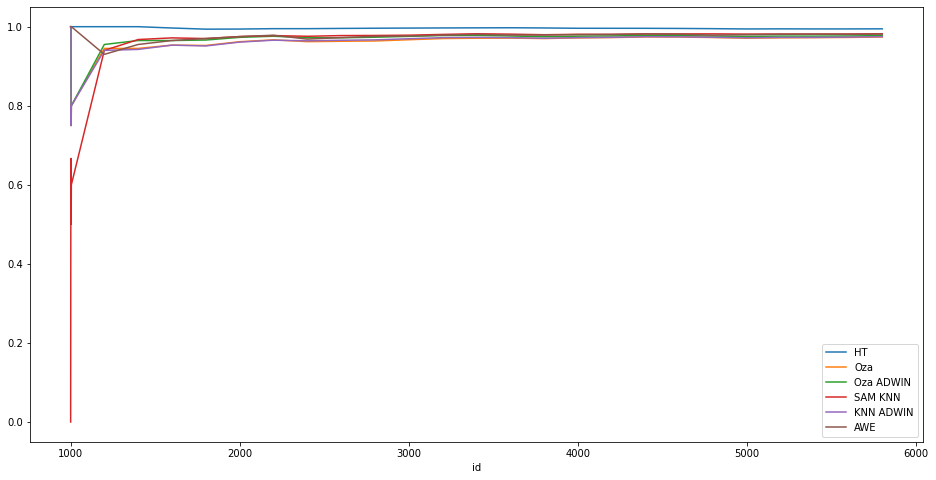

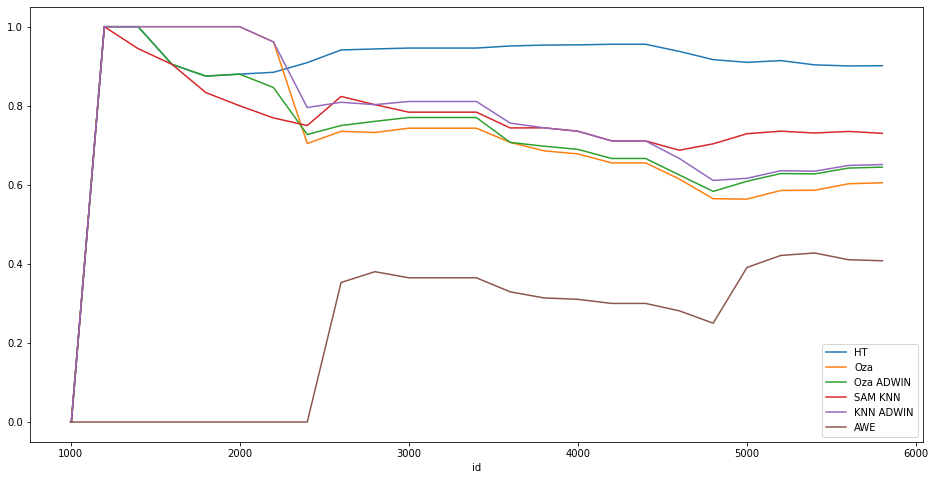

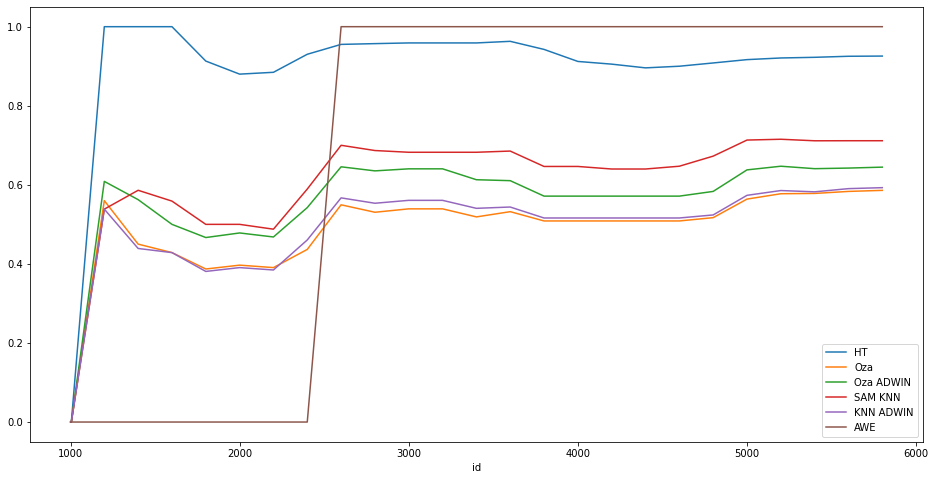

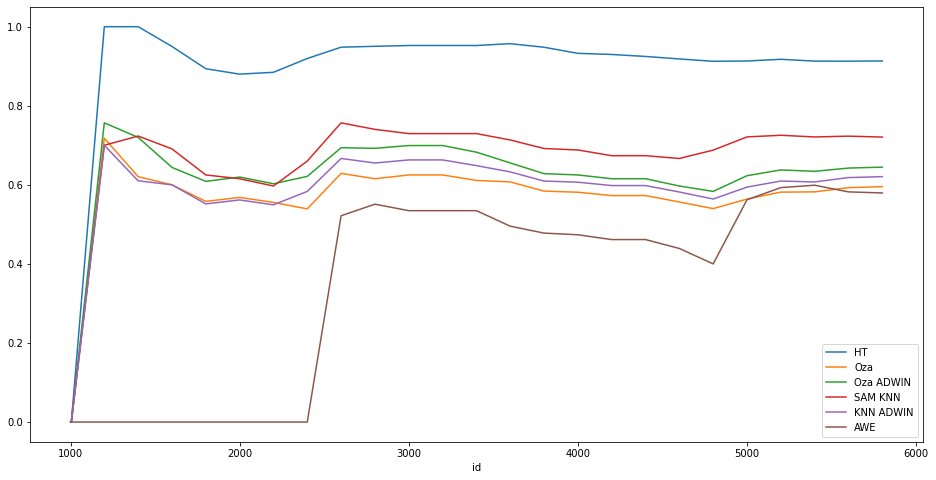

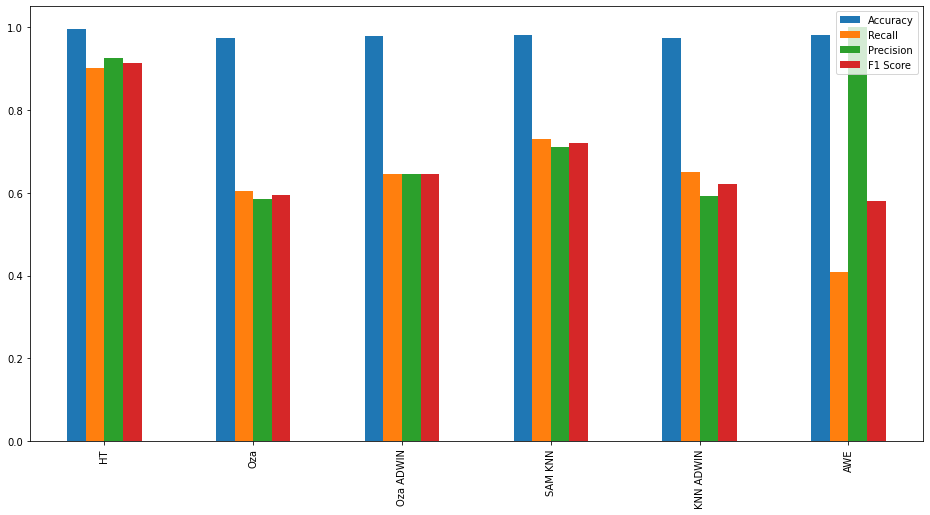

,Accuracy,Recall,Precision,F1 Score
HT,0.994583,0.901316,0.925676,0.913333
Oza,0.973958,0.605263,0.585987,0.595469
Oza ADWIN,0.977500,0.644737,0.644737,0.644737
SAM KNN,0.982083,0.730263,0.711538,0.720779
KNN ADWIN,0.974792,0.651316,0.592814,0.620690
AWE,0.981250,0.407895,1.000000,0.579439


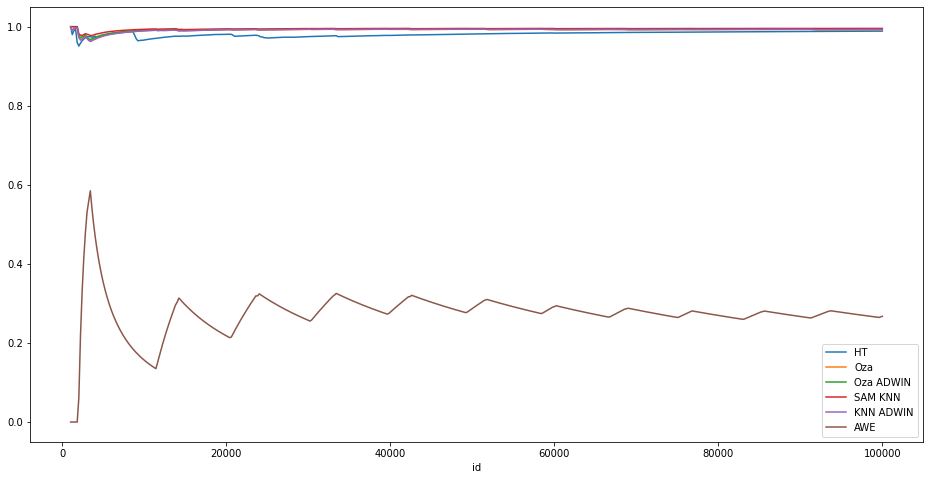

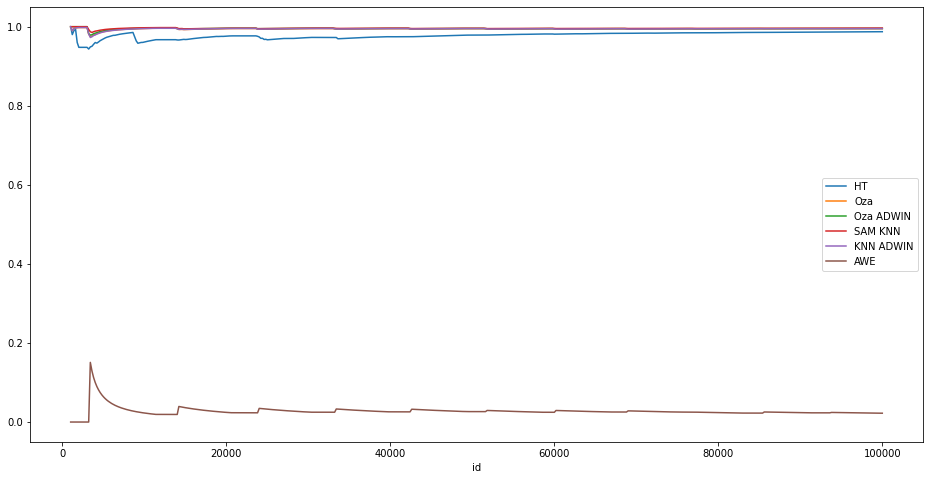

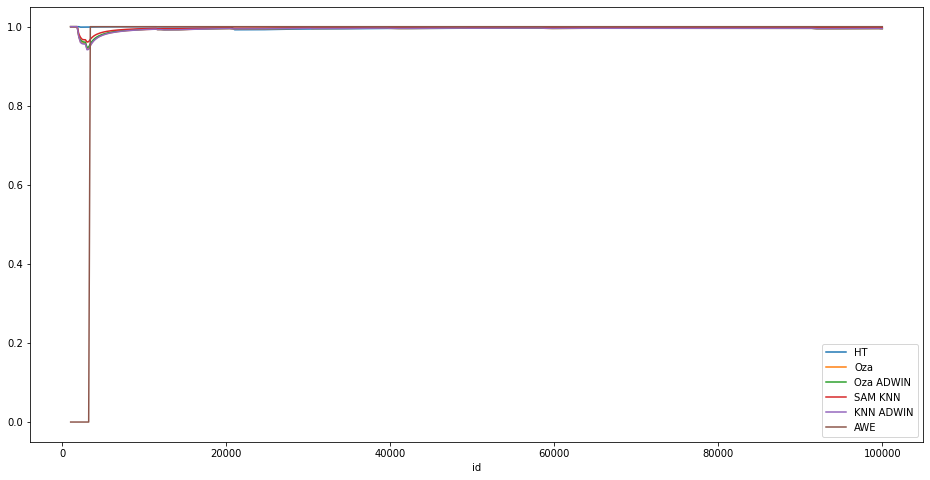

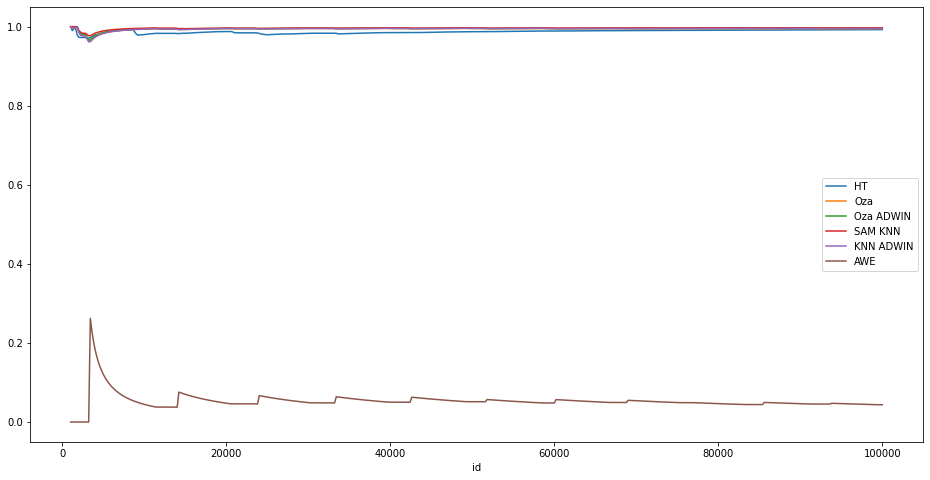

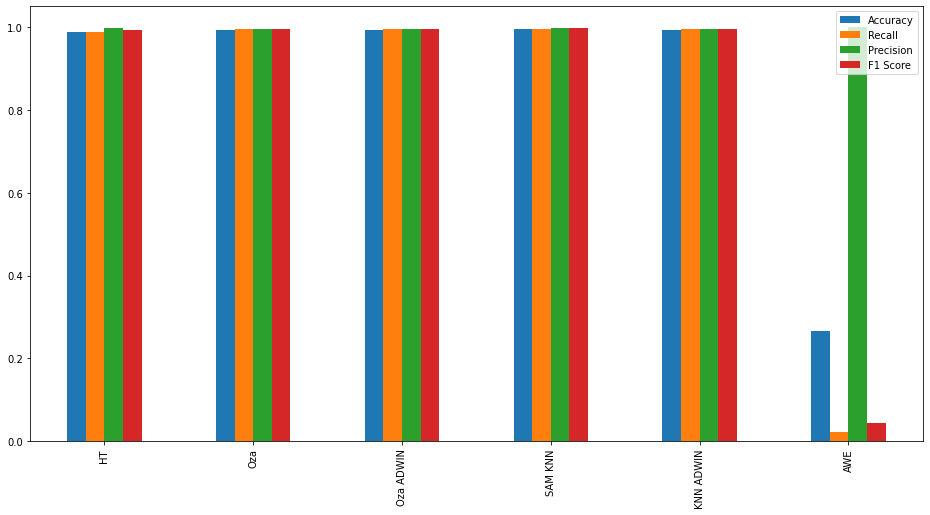

,Accuracy,Recall,Precision,F1 Score
HT,0.988838,0.987301,0.997779,0.992513
Oza,0.992606,0.995147,0.994986,0.995067
Oza ADWIN,0.992960,0.995457,0.995149,0.995303
SAM KNN,0.995626,0.996495,0.997665,0.997080
KNN ADWIN,0.992616,0.995160,0.994986,0.995073
AWE,0.267444,0.022351,1.000000,0.043724


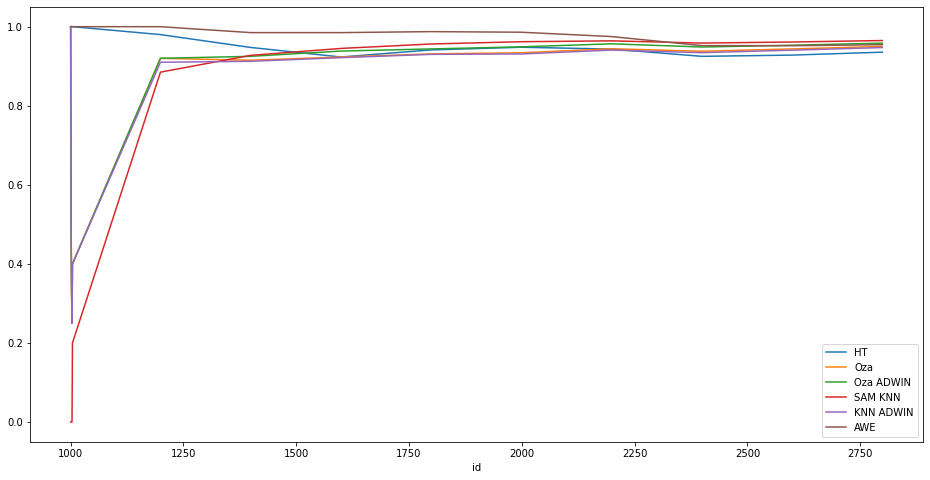

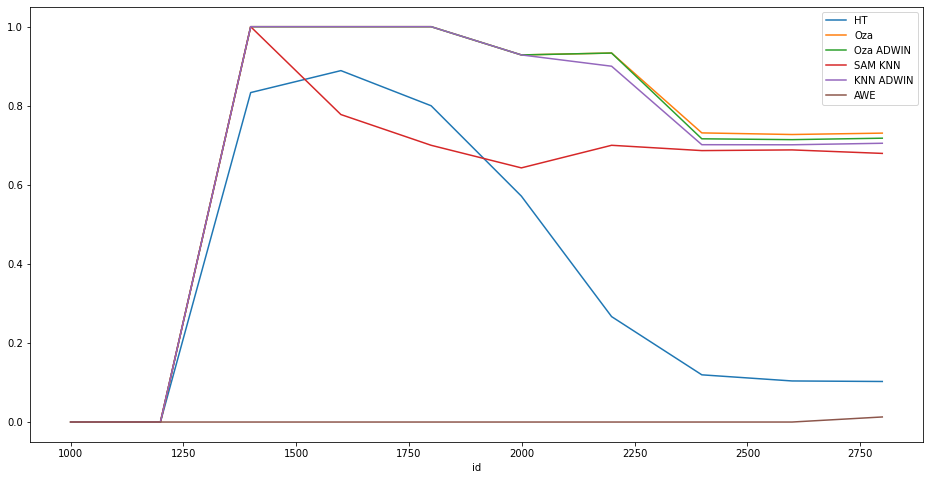

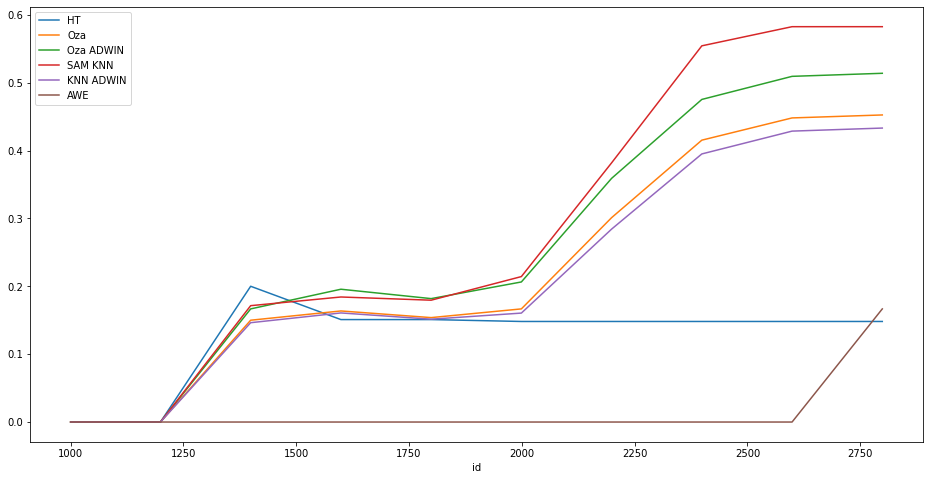

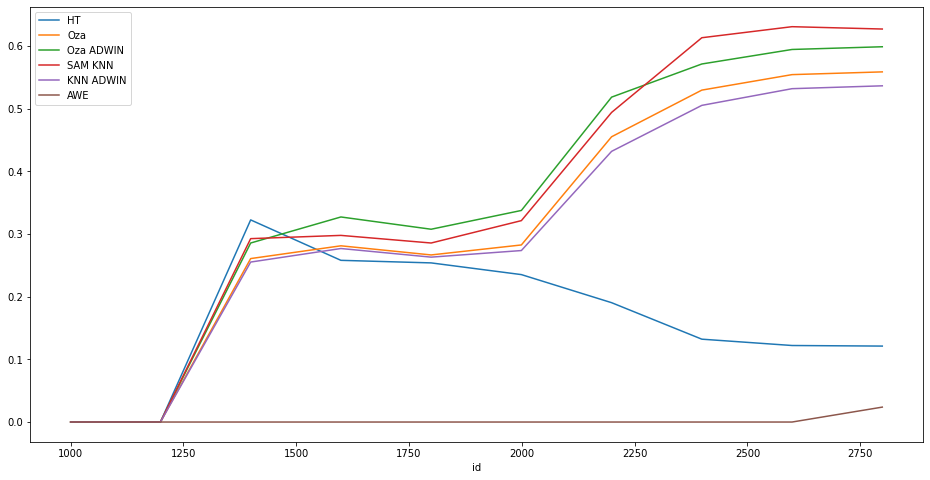

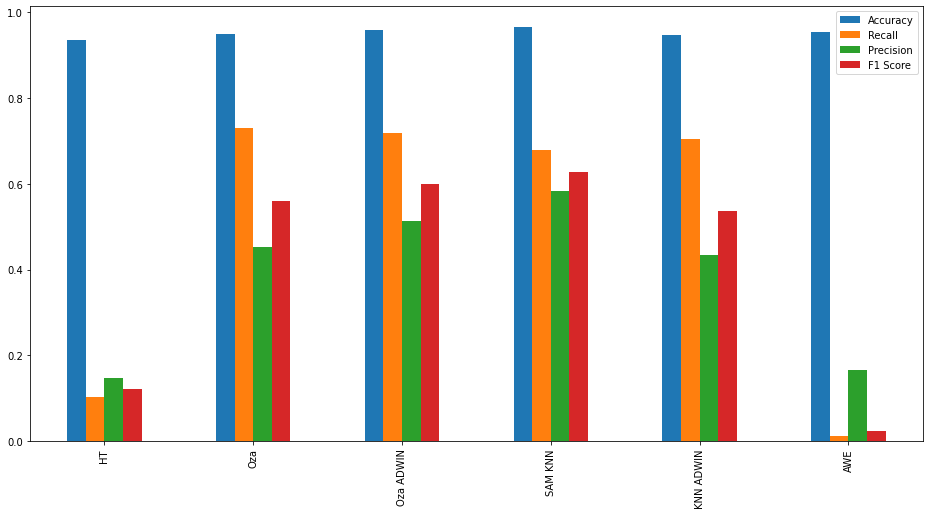

,Accuracy,Recall,Precision,F1 Score
HT,0.935556,0.102564,0.148148,0.121212
Oza,0.950000,0.730769,0.452381,0.558824
Oza ADWIN,0.958333,0.717949,0.513761,0.598930
SAM KNN,0.965000,0.679487,0.582418,0.627219
KNN ADWIN,0.947222,0.705128,0.433071,0.536585
AWE,0.954444,0.012821,0.166667,0.023810


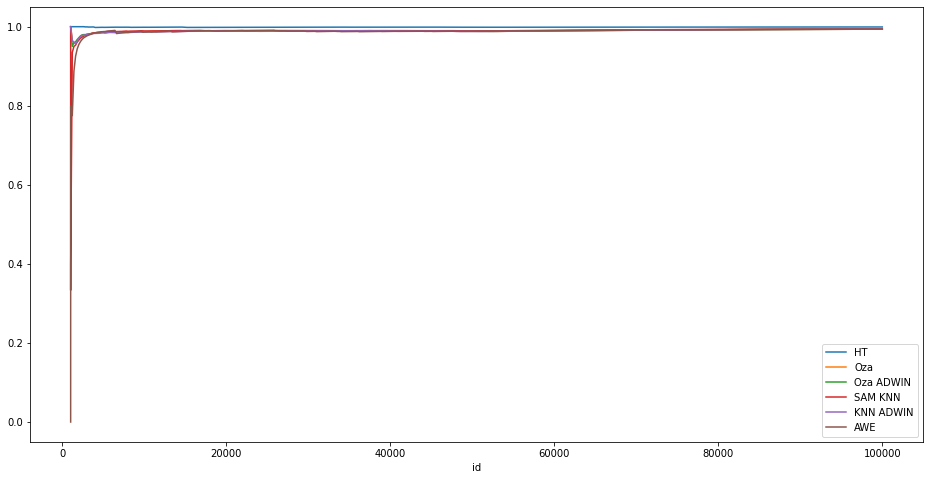

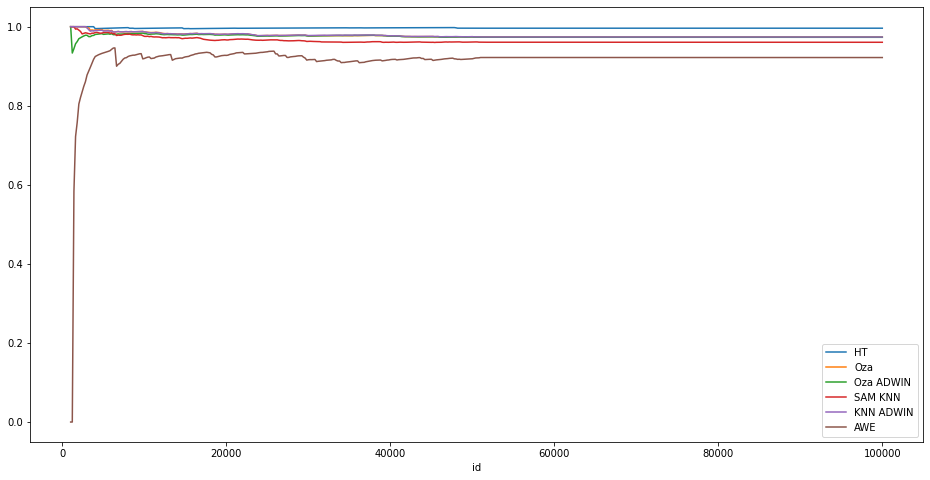

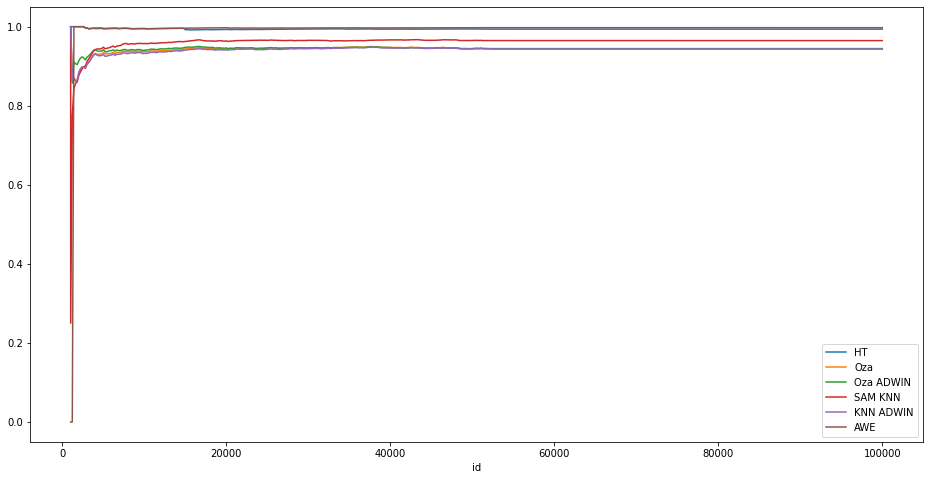

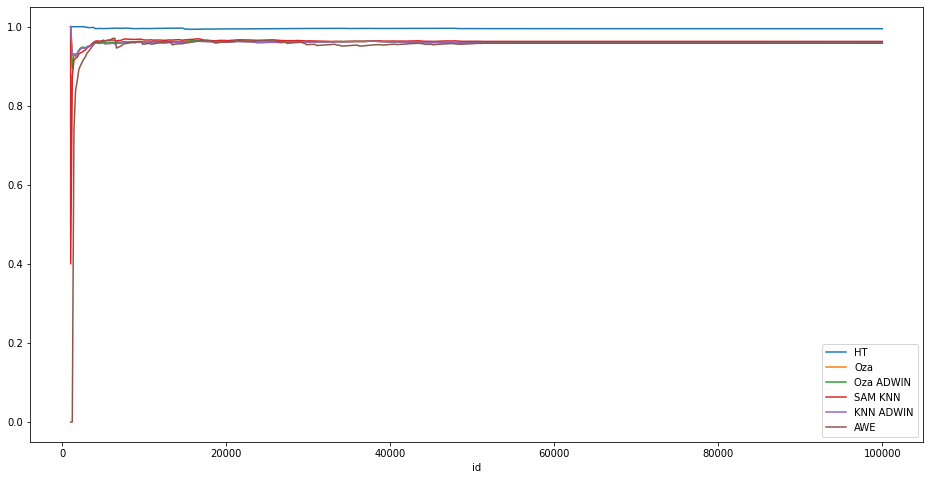

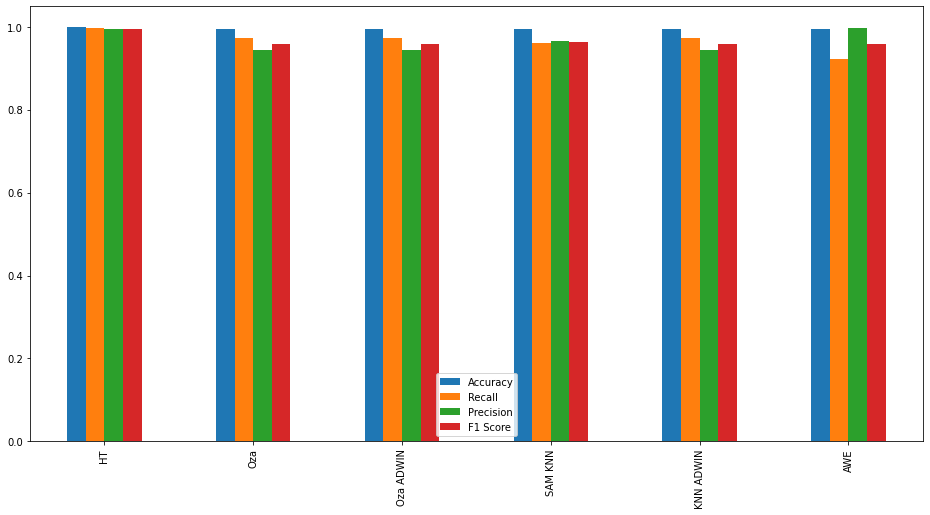

,Accuracy,Recall,Precision,F1 Score
HT,0.999253,0.996166,0.993717,0.994940
Oza,0.993778,0.973846,0.943612,0.958491
Oza ADWIN,0.993808,0.973162,0.944577,0.958657
SAM KNN,0.994505,0.960564,0.964792,0.962673
KNN ADWIN,0.993778,0.973846,0.943612,0.958491
AWE,0.994071,0.921950,0.997481,0.958230


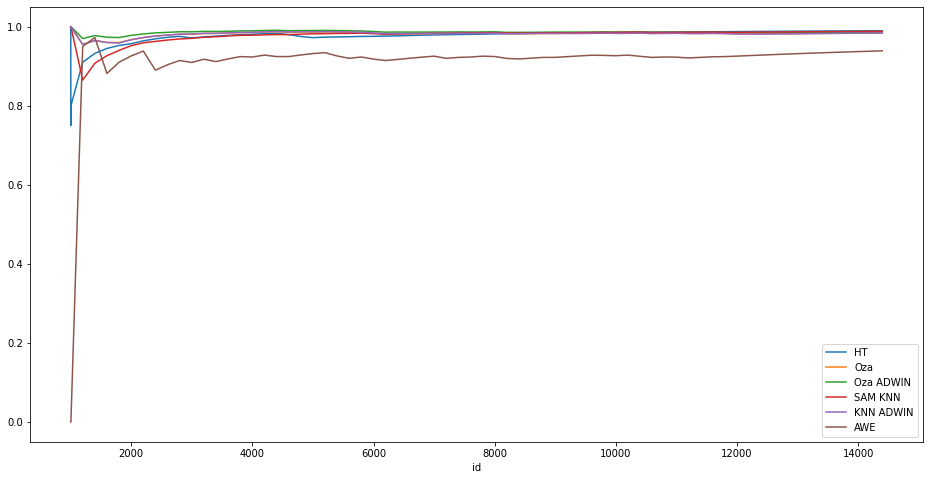

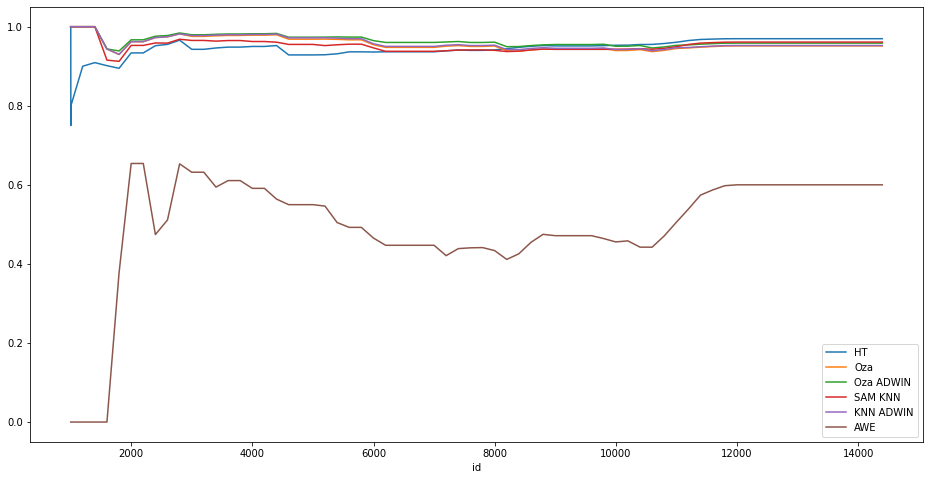

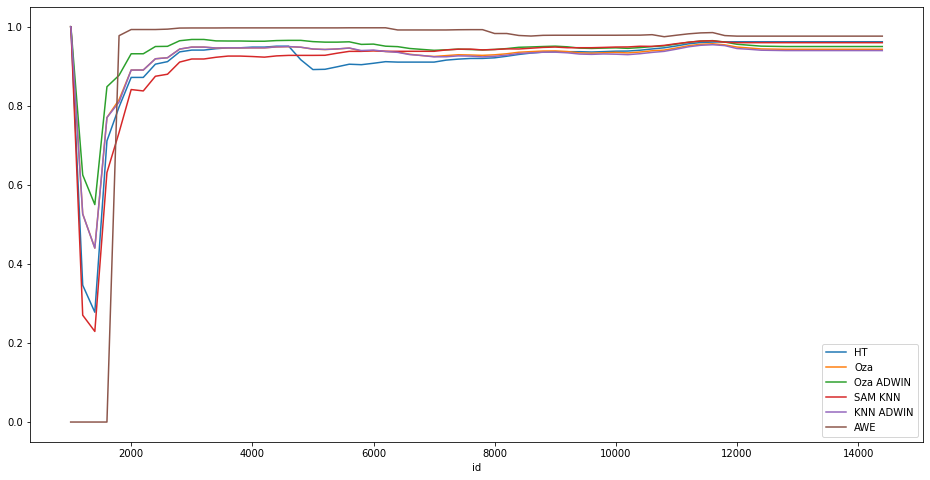

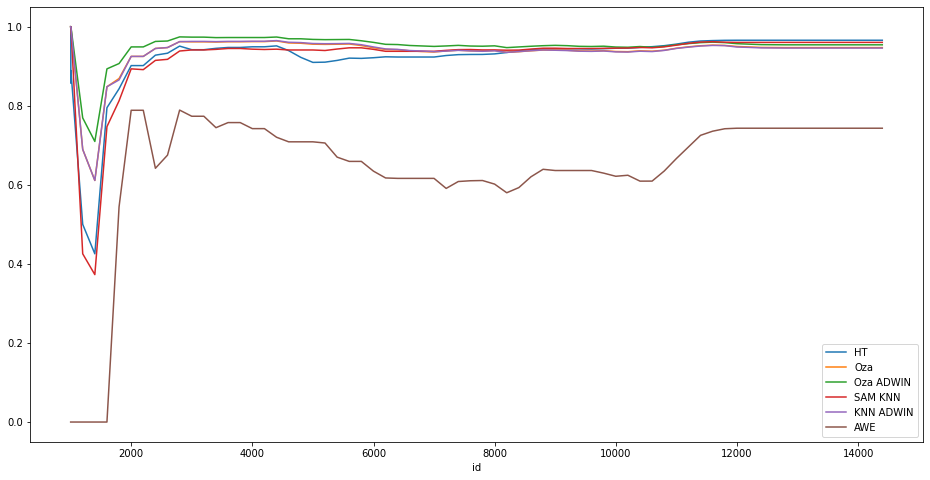

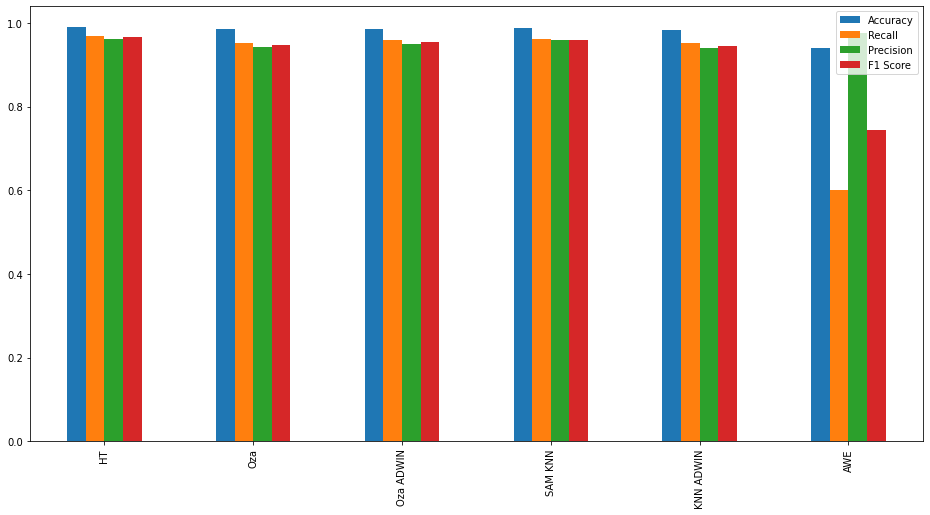

,Accuracy,Recall,Precision,F1 Score
HT,0.989851,0.969620,0.961828,0.965709
Oza,0.984328,0.951392,0.942800,0.947077
Oza ADWIN,0.986418,0.958481,0.949824,0.954133
SAM KNN,0.988284,0.961013,0.959555,0.960283
KNN ADWIN,0.983955,0.952405,0.939560,0.945939
AWE,0.938881,0.600000,0.976112,0.743180


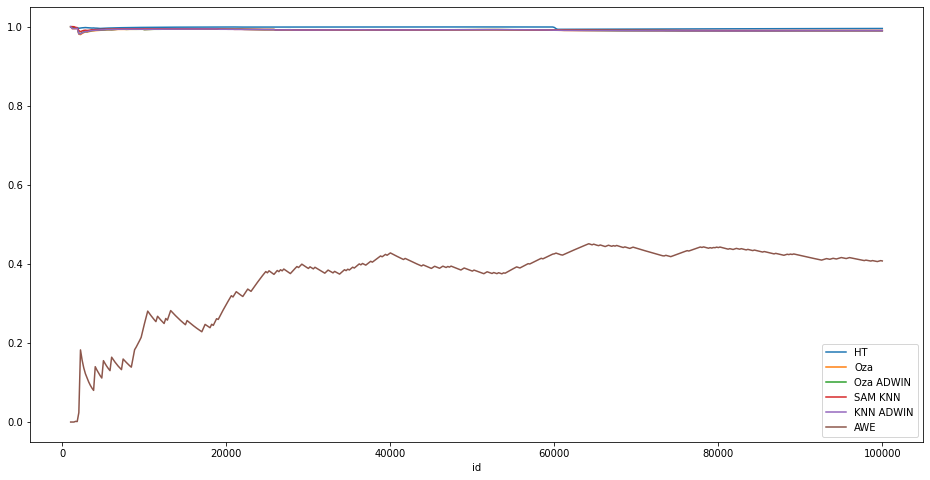

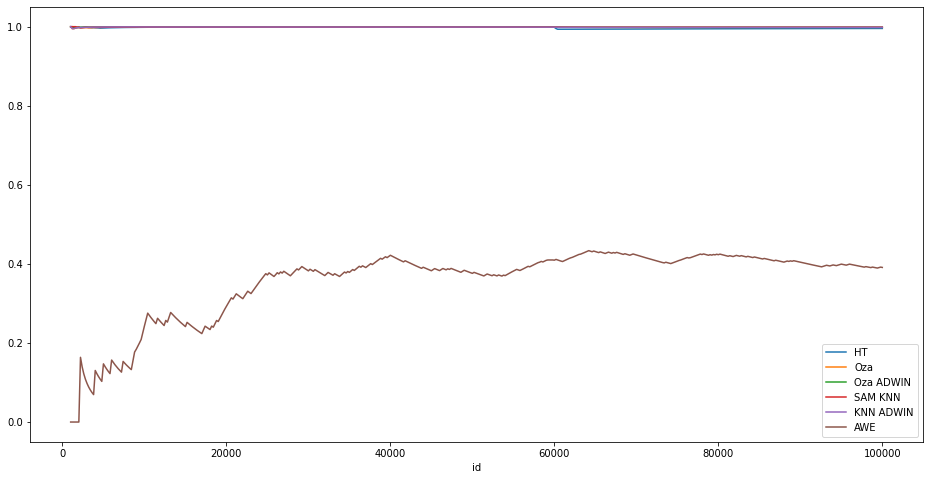

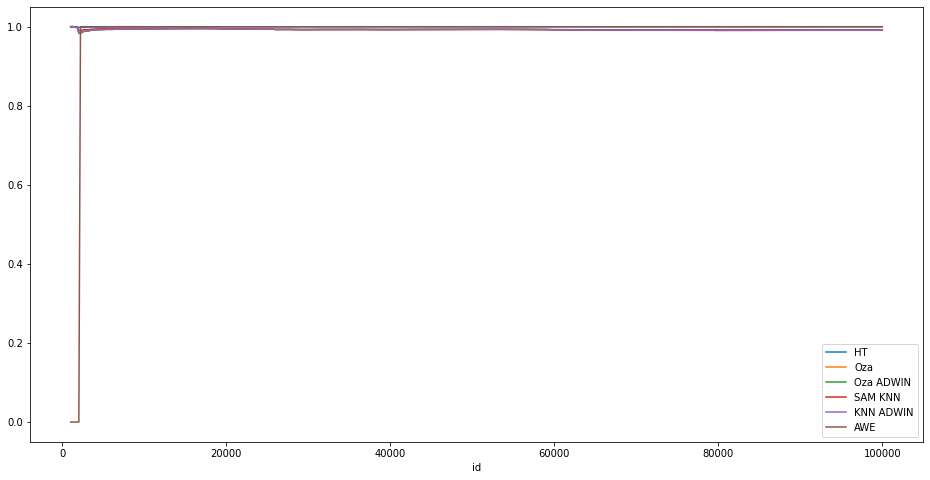

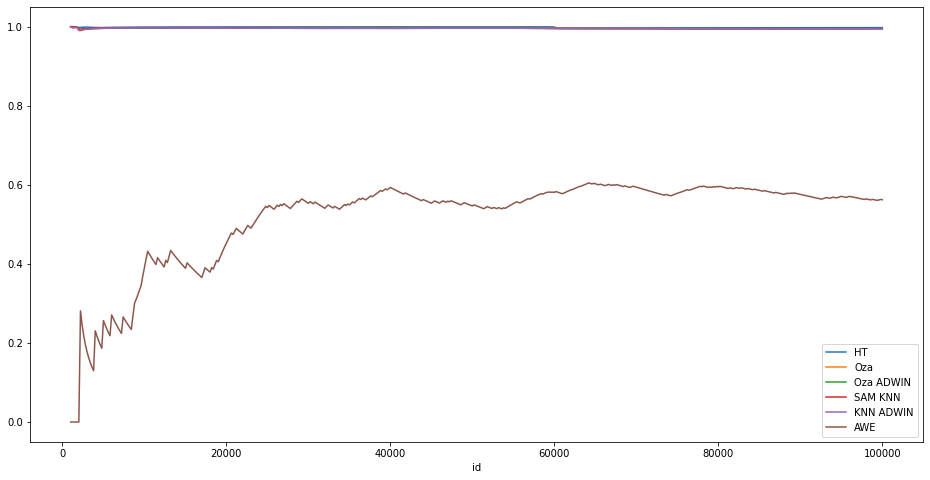

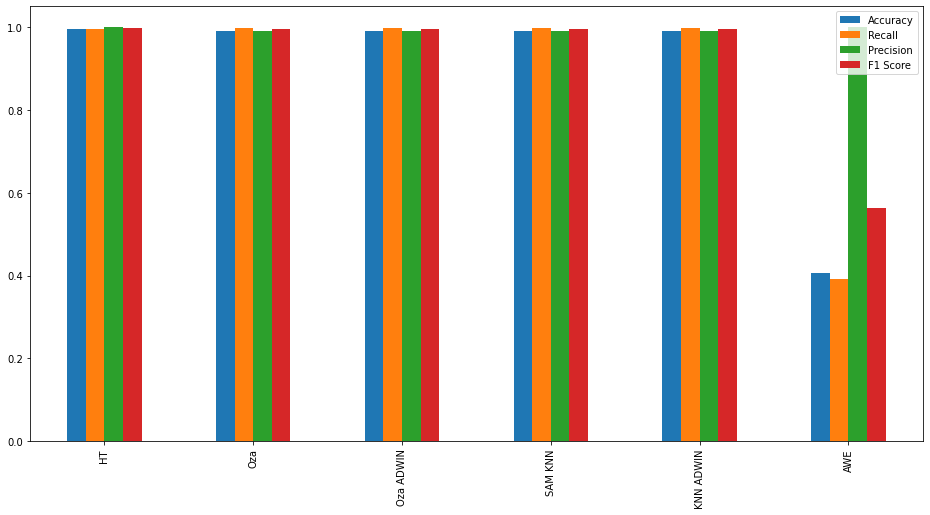

,Accuracy,Recall,Precision,F1 Score
HT,0.995444,0.995557,0.999760,0.997654
Oza,0.989667,0.998339,0.991106,0.994710
Oza ADWIN,0.989818,0.998505,0.991098,0.994788
SAM KNN,0.990495,0.998578,0.991711,0.995133
KNN ADWIN,0.989545,0.998391,0.990933,0.994648
AWE,0.407455,0.391054,0.999973,0.562237


In [11]:
def gather_lines(dataframe, metric):
    df = dataframe.loc[:, [ f'mean_{metric}_[{model_name}]' for model_name in MODEL_NAMES ] ]
    return df.rename(columns=lambda x: re.findall(f'mean_{metric}_\[([A-Za-z\s]+)\]', x)[0])


def bar_comparison(dataframe, metrics):
    return pd.DataFrame(dict([ 
        (title, [ dataframe[f'mean_{tag}_[{model_name}]'].iloc[-1]  for model_name in MODEL_NAMES ])
        for title, tag in metrics
    ]), index=MODEL_NAMES)


def report(file_name):
    display(h(2, util.basename(file_name)))
    results = pd.read_csv(output_path(file_name, 'metrics'), skiprows=10, index_col='id')

    metrics = [ ('Accuracy', 'acc'), ('Recall', 'recall'), ('Precision', 'precision'), ('F1 Score', 'f1') ]
    fig_size = (16, 8)

    for title, metric in metrics:
        display(h(3, title))
        gather_lines(results, metric).plot.line(figsize=fig_size)
        plt.show()

    bar_data = bar_comparison(results, metrics)
    bar_data.plot.bar(figsize=fig_size)
    plt.show()
    display(bar_data)

    display(HR)


for file_name in CSV_FILE_NAMES:
    report(file_name)